In [1]:
import pandas as pd


def reformat(df):
    cols = ["Below 0.4","Above 0.9", "Between 0.4 and 0.9", "Full dataset"]
    df = df.reset_index().rename(columns={'index': 'method'})

    for col in cols:
        col_df = df[col].apply(pd.Series)
        col_df = col_df.rename(columns=lambda x: f"{col}_{x}")
        df = pd.concat([df.drop([col], axis=1), col_df], axis=1)

    
    resp_df = df.responses_score.apply(pd.Series)
    resp_df = resp_df.rename(columns=lambda x: f"Response_{x}")
    df = df.drop(['responses_score'],axis=1)
    # df = pd.concat([df.drop(['responses_score'], axis=1), resp_df], axis=1)
    return df

df = pd.read_json('rm_eval/eval_metrics_q_mse.json',orient='index')
df = reformat(df)

df2 = pd.read_json('rm_eval/eval_metrics_q_.json',orient='index')
df2 = reformat(df2)

df3 = pd.read_json('rm_eval/eval_metrics_q_eos.json',orient='index')
df3 = reformat(df3)

df4 = pd.read_json('rm_eval/eval_metrics_q_aug_and_under.json',orient='index')
df4 = reformat(df4)


df5 = pd.read_json('rm_eval/eval_metrics_q_aug_and_under2.json',orient='index')
df5 = reformat(df5)

df6 = pd.read_json('rm_eval/eval_metrics_q_aug_over_and_under.json',orient='index')
df6 = reformat(df6)


df7 = pd.read_json("rm_eval/eval_metrics_q_aug_over_and_under_un_till16.json",orient='index')
df7 = reformat(df7)


df8 = pd.read_json("rm_eval/eval_metrics_q_aug_and_under_un_till16_1.json",orient='index')
df8 = reformat(df8)

df

,method,Below 0.4_mse,Below 0.4_mae,Above 0.9_mse,Above 0.9_mae,Between 0.4 and 0.9_mse,Between 0.4 and 0.9_mae,Full dataset_mse,Full dataset_mae
0,abs_mse_s_075_quality,0.3158782,0.51607615,0.06420932,0.19708948,0.12091556,0.28012288,0.12887712,0.2870976


In [2]:
final_df = pd.concat([df3,df2,df4,df5,df6,df7,df8])
final_df = final_df.reset_index(drop=True)

for column in final_df.columns:
    # Skip non-numeric columns
    if column != 'method':
        final_df[column] = pd.to_numeric(final_df[column], errors='coerce')  # 'coerce' will set invalid parsing to NaN

final_df = final_df.round(4)
final_df = final_df[final_df["method"] != "abs_logistic_s_075_quality_eos_token"]

mse_vs_logistic = ['abs_logistic_over_and_under_s_75_quality','abs_sig_mse_s_075_quality','abs_sig_mse_aug_and_under_quality','abs_logistic_aug_and_under_quality','abs_sig_mse_aug_over_and_un_till16_w14_for_04_09_quality','abs_logistic_aug_over_and_un_till16_w14_for_04_09_quality']
mse_vs_logistic_df = final_df[final_df["method"].isin(mse_vs_logistic)].reset_index(drop=True)

mse_vs_logistic_df = mse_vs_logistic_df.drop(columns=["Full dataset_mse","Full dataset_mae"])

weightcomparision = ['abs_logistic_aug_and_under_s_05_quality','abs_logistic_aug_and_under_s_075_quality','abs_logistic_over_and_under_s_05_quality','abs_logistic_over_and_under_s_75_quality','abs_logistic_over_and_under_quality','abs_logistic_s_05_quality','abs_logistic_s_075_quality','abs_logistic_quality']
weightcomparision_df = final_df[final_df["method"].isin(weightcomparision)].reset_index(drop=True)


weightcomparision_df

,method,Below 0.4_mse,Below 0.4_mae,Above 0.9_mse,Above 0.9_mae,Between 0.4 and 0.9_mse,Between 0.4 and 0.9_mae,Full dataset_mse,Full dataset_mae
0,abs_logistic_aug_and_under_s_05_quality,0.1052,0.2799,0.0568,0.2080,0.0275,0.1322,0.0403,0.1601
1,abs_logistic_aug_and_under_s_075_quality,0.0721,0.2267,0.0852,0.2640,0.0335,0.1471,0.0467,0.1762
2,abs_logistic_over_and_under_s_05_quality,0.0519,0.1801,0.1195,0.3174,0.0465,0.1754,0.0605,0.2021
3,abs_logistic_over_and_under_s_75_quality,0.0611,0.1999,0.1027,0.2923,0.0415,0.1662,0.0547,0.1927
4,abs_logistic_over_and_under_quality,0.1051,0.2752,0.0534,0.2009,0.0290,0.1351,0.0407,0.1605
5,abs_logistic_s_05_quality,0.0771,0.2348,0.0862,0.2765,0.0293,0.1392,0.0444,0.1736
6,abs_logistic_s_075_quality,0.0591,0.2040,0.1159,0.3205,0.0369,0.1573,0.0536,0.1919
7,abs_logistic_quality,0.1227,0.3099,0.0518,0.2091,0.0222,0.1192,0.0372,0.1538


In [3]:
# Pivot the DataFrame to have multi-level columns suitable for multirow headers
final_df.columns = pd.MultiIndex.from_tuples(
    [tuple(c.split('_')) if '_' in c and c.split('_')[0] != 'Response' else (c, '') for c in final_df.columns]
)

# Pivot the DataFrame to have multi-level columns suitable for multirow headers
mse_vs_logistic_df.columns = pd.MultiIndex.from_tuples(
    [tuple(c.split('_')) if '_' in c and c.split('_')[0] != 'Response' else (c, '') for c in mse_vs_logistic_df.columns]
)

# Pivot the DataFrame to have multi-level columns suitable for multirow headers
weightcomparision_df.columns = pd.MultiIndex.from_tuples(
    [tuple(c.split('_')) if '_' in c and c.split('_')[0] != 'Response' else (c, '') for c in weightcomparision_df.columns]
)

final_df

method Below 0.4          \
                                                            mse     mae   
0                           abs_sig_mse_s_075_quality    0.0618  0.1981   
1             abs_logistic_aug_and_under_s_05_quality    0.1052  0.2799   
2            abs_logistic_aug_and_under_s_075_quality    0.0721  0.2267   
3            abs_logistic_over_and_under_s_05_quality    0.0519  0.1801   
4            abs_logistic_over_and_under_s_75_quality    0.0611  0.1999   
5                 abs_logistic_over_and_under_quality    0.1051  0.2752   
6                           abs_logistic_s_05_quality    0.0771  0.2348   
7                          abs_logistic_s_075_quality    0.0591  0.2040   
8                                abs_logistic_quality    0.1227  0.3099   
9                  abs_logistic_aug_and_under_quality    0.0853  0.2446   
10                  abs_sig_mse_aug_and_under_quality    0.1056  0.2827   
11  abs_logistic_aug_and_under_s_075_for_04_09_qua...    0.0584  0.1913   
12  abs_logistic_aug_over_and_under_w14_for_04_09_...    0.1235  0.3032   
13  abs_sig_mse_aug_over_and_un_till16_s_075_w_14_...    0.0983  0.2693   
14  abs_sig_mse_aug_over_and_un_till16_w14_for_04_...    0.1223  0.3030   
15  abs_logistic_aug_over_and_un_till16_w14_for_04...    0.0889  0.2555   
16                                               rank    0.0633  0.1879   
17  abs_sig_mse_aug_and_un_till16_s_075_w_14_09_qu...    0.1215  0.3023   
18        abs_sig_mse_aug_and_un_till16_s_075_quality    0.0797  0.2358   

   Above 0.9         Between 0.4 and 0.9         Full dataset          
         mse     mae                 mse     mae          mse     mae  
0     0.0964  0.2800              0.0423  0.1652       0.0541  0.1895  
1     0.0568  0.2080              0.0275  0.1322       0.0403  0.1601  
2     0.0852  0.2640              0.0335  0.1471       0.0467  0.1762  
3     0.1195  0.3174              0.0465  0.1754       0.0605  0.2021  
4     0.1027  0.2923              0.0415  0.1662       0.0547  0.1927  
5     0.0534  0.2009              0.0290  0.1351       0.0407  0.1605  
6     0.0862  0.2765              0.0293  0.1392       0.0444  0.1736  
7     0.1159  0.3205              0.0369  0.1573       0.0536  0.1919  
8     0.0518  0.2091              0.0222  0.1192       0.0372  0.1538  
9     0.0786  0.2493              0.0326  0.1455       0.0461  0.1740  
10    0.0593  0.2132              0.0299  0.1360       0.0425  0.1641  
11    0.1277  0.3235              0.0529  0.1880       0.0672  0.2134  
12    0.0415  0.1689              0.0294  0.1357       0.0406  0.1577  
13    0.0576  0.2112              0.0265  0.1296       0.0390  0.1579  
14    0.0441  0.1796              0.0255  0.1262       0.0381  0.1528  
15    0.0645  0.2320              0.0263  0.1301       0.0393  0.1608  
16    0.1347  0.2843              0.0990  0.2598       0.1022  0.2575  
17    0.0483  0.1931              0.0254  0.1272       0.0388  0.1559  
18    0.0806  0.2589              0.0300  0.1390       0.0441  0.1703

In [4]:
def highlight_extreme_values(s):
    '''
    Highlight the maximum in red, the minimum in green, the second lowest in light green, 
    and the third lowest in blue.
    '''
    is_max = s == s.max()
    is_min = s == s.min()
    
    # Sort the values and safely get the second and third lowest
    sorted_values = s.sort_values()
    is_second_lowest = s == sorted_values.iloc[1] if len(s) > 1 else False
    is_third_lowest = s == sorted_values.iloc[2] if len(s) > 2 else False

    return ['background-color: red' if max_val else 
            'background-color: green' if min_val else 
            'background-color: yellow' if (len(s) > 1 and second_lowest) else 
            'background-color: orange' if (len(s) > 2 and third_lowest) else '' 
            for max_val, min_val, second_lowest, third_lowest in zip(is_max, is_min, is_second_lowest, is_third_lowest)]

final_df['diff'] = (final_df["Below 0.4"]["mae"]-final_df["Above 0.9"]["mae"]).abs()
# Apply the highlight function to the DataFrame except for the 'method' column
df_highlighted = final_df.style.apply(highlight_extreme_values, subset=final_df.columns[1:])

df_highlighted

In [5]:

df_highlighted = mse_vs_logistic_df.style.apply(highlight_extreme_values, subset=mse_vs_logistic_df.columns[1:])

df_highlighted



In [6]:
weightcomparision_df['diff'] = (weightcomparision_df["Below 0.4"]["mae"]-weightcomparision_df["Above 0.9"]["mae"]).abs()

df_highlighted = weightcomparision_df.style.apply(highlight_extreme_values, subset=weightcomparision_df.columns[1:])

df_highlighted

In [7]:

# data for comparing the mode manually:

data = [
[["Explain the importance of a balanced diet."],
    ["A balanced diet is crucial for maintaining good health. It ensures that your body gets all the essential nutrients it needs, including vitamins, minerals, proteins, carbohydrates, and fats. This helps in regulating body functions, supporting growth and development, and preventing chronic diseases. A balanced diet also contributes to mental well-being and energy levels, playing a key role in overall lifestyle quality.",
    "Eating a balanced diet means just choosing different foods. It's like, you shouldn't eat only pizza every day. Maybe add some fruits or something sometimes. It's better than eating bad stuff all the time, I guess.",
    "While talking about a balanced diet, it's interesting to note that the agricultural practices of the 18th century significantly differed from modern techniques. Back then, crop rotation and the use of natural fertilizers led to a different quality of produce. This historical perspective, though fascinating, does not directly address the current dietary practices or their health implications.",
    "Diet balance is like a garden salad, twirling in nutrition and sunshine rainbows. Vitamins dance with minerals on a plate of healthful harmony. Energy sparkles in the symphony of food melody, where carrots and apples sing in a choir of wellness tunes.",
    ]]
]

data = [
    [["Discuss the role of exercise in maintaining health."],
     ["Regular exercise is fundamental to maintaining health. It strengthens the cardiovascular system, improves muscle tone and flexibility, and helps regulate weight. Exercise also releases endorphins, enhancing mental health by reducing stress and anxiety. It boosts immune function, decreases the risk of chronic diseases, and promotes overall longevity and quality of life.",
      "Doing exercise is good because it's better than sitting. You can run or walk, just move around more. It's probably good for health because moving is better than just watching TV or something.",
      "When considering exercise, it's notable that ancient Roman gladiators had rigorous training routines. Their regimen, though primarily for combat, included various physical activities. However, this historical aspect, while intriguing, doesn't directly relate to modern exercise practices or their specific health benefits.",
      "Exercise is like a rainbow of energetic butterflies fluttering in the wellness sky. Muscle marathons race with heartbeat drums, creating a symphony of sweat and joy. It's a dance of vitality where sneakers echo on the treadmill of happiness.",
     ]]
]

data = [
    [["Explain the significance of renewable energy sources."],
     ["Renewable energy sources, such as solar, wind, and hydro, are vital for sustainable development. They provide a clean, inexhaustible supply of energy, reducing reliance on fossil fuels, which are finite and pollute the environment. The use of renewable energy mitigates climate change, conserves natural resources, and promotes energy security and independence.",
      "Renewable energy is using stuff like the sun or wind for power. It's good because it's not like oil or coal, which are bad, I think. So, using the sun and wind is probably a better idea.",
      "Reflecting on renewable energy, it's interesting to ponder the windmill designs of the Dutch Golden Age. These windmills, iconic and historic, were used for various industrial purposes. However, this reflection on historical engineering doesn't directly address the modern environmental and economic impacts of renewable energy.",
      "Renewable energy is a carousel of sunbeams and breezy whispers, dancing in a green energy waltz. Solar panels bask in the glow of nature's smile, while wind turbines whirl in the symphony of eco-friendly dreams.",
    ]]
]


data = [
    [["Describe the effects of global warming."],
     ["Global warming, caused by the increased concentration of greenhouse gases from human activities, leads to significant environmental changes. It results in rising global temperatures, melting polar ice caps, and rising sea levels. These changes cause extreme weather patterns, biodiversity loss, and habitat destruction. Additionally, global warming has profound impacts on agriculture, water resources, and human health, necessitating urgent action to mitigate its effects.",
      "Global warming is when it gets hotter everywhere. It's bad because summers are really hot, and ice melts at the poles. I think it's not good for animals either, especially the ones in cold places.",
      "Considering global warming, it's fascinating to explore the fashion trends of the Victorian era, characterized by heavy fabrics and elaborate designs. Although this period's fashion is an intriguing aspect of history, it does not directly relate to the environmental and societal impacts of global warming in the contemporary context.",
      "Global warming is like a blanket of invisible sunbeams, wrapping the Earth in a simmering hug of temperature tango. Icebergs waltz in the warm ocean ballet, and polar bears conduct the symphony of climate change serenades.",
     ]
    ]
]

data


[[['Describe the effects of global warming.'],
  ['Global warming, caused by the increased concentration of greenhouse gases from human activities, leads to significant environmental changes. It results in rising global temperatures, melting polar ice caps, and rising sea levels. These changes cause extreme weather patterns, biodiversity loss, and habitat destruction. Additionally, global warming has profound impacts on agriculture, water resources, and human health, necessitating urgent action to mitigate its effects.',
   "Global warming is when it gets hotter everywhere. It's bad because summers are really hot, and ice melts at the poles. I think it's not good for animals either, especially the ones in cold places.",
   "Considering global warming, it's fascinating to explore the fashion trends of the Victorian era, characterized by heavy fabrics and elaborate designs. Although this period's fashion is an intriguing aspect of history, it does not directly relate to the environmental

In [8]:
# Now convert the DataFrame to LaTeX
latex_table = mse_vs_logistic_df.to_latex(index=False, float_format="{:0.4f}".format, multirow=True, multicolumn=True, multicolumn_format='c', escape=False)



print(latex_table)

\begin{tabular}{lrrrrrr}
\toprule
method & \multicolumn{2}{c}{Below 0.4} & \multicolumn{2}{c}{Above 0.9} & \multicolumn{2}{c}{Between 0.4 and 0.9} \\
 & mse & mae & mse & mae & mse & mae \\
\midrule
abs_sig_mse_s_075_quality & 0.0618 & 0.1981 & 0.0964 & 0.2800 & 0.0423 & 0.1652 \\
abs_logistic_over_and_under_s_75_quality & 0.0611 & 0.1999 & 0.1027 & 0.2923 & 0.0415 & 0.1662 \\
abs_logistic_aug_and_under_quality & 0.0853 & 0.2446 & 0.0786 & 0.2493 & 0.0326 & 0.1455 \\
abs_sig_mse_aug_and_under_quality & 0.1056 & 0.2827 & 0.0593 & 0.2132 & 0.0299 & 0.1360 \\
abs_sig_mse_aug_over_and_un_till16_w14_for_04_09_quality & 0.1223 & 0.3030 & 0.0441 & 0.1796 & 0.0255 & 0.1262 \\
abs_logistic_aug_over_and_un_till16_w14_for_04_09_quality & 0.0889 & 0.2555 & 0.0645 & 0.2320 & 0.0263 & 0.1301 \\
\bottomrule
\end{tabular}



## Analyze the reward score on sft prediction

In [1]:
# import json
# import transformers

# import numpy as np
# import matplotlib.pyplot as plt
# import scipy.stats as stats


# model_name = "andreaskoepf/llama2-7b-oasst-baseline"
# tokenizer = transformers.AutoTokenizer.from_pretrained(model_name, cache_dir='cache')
# tokenizer.add_special_tokens({"pad_token":"<PAD>","eos_token":"<|im_end|>","sep_token":"<SEP>"})

# path = "../output/rl/LLama-2-7b-oasst-basseline_sft/rewarded_eval/final_p_09_t_08_sft_output.json"
# with open(path,'r') as f:
#     data = json.load(f)

# data[0]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'query': '<|im_start|>user\nI like to host guests at my home from time to time, and I am gathering  recipes of different dishes and drinks to keep things interesting. I am interested in trying some Danish dishes. Can you give me a recipe for Flæskesteg?<|im_end|>\n<|im_start|>assistant\n',
 'response': "Certainly! Here's a recipe for Danish Roast Pork (Flæskesteg):\n\nIngredients:\n\n1 pork loin (about 3 pounds)\n3 tablespoons butter\n1 teaspoon salt\n1 teaspoon black pepper\n1 teaspoon paprika\n1 onion, chopped\n3 cloves garlic, minced\n2 tablespoons flour\n2 cups beer\n1/2 cup chicken broth\n1 cup water\n1 tablespoon sugar\nInstructions:\n\nPreheat the oven to 350°F (180°C).\n\nRinse the pork under cold water and pat it dry with a paper towel. Sprinkle it with salt, pepper, paprika, and the chopped onion. Tie the pork loin with butcher's twine so that it is secure but still allows air to circulate.\n\nHeat the butter in a large skillet over medium heat. Add the pork and cook until b

In [8]:
# reward_preference = []
# reward_abs_score = []
# response_length = []


# for d in data:
#     reward_preference.append(d["reward"])
#     reward_abs_score.append(d["abs_reward"])
#     response_length.append(len(tokenizer(d["response"])["input_ids"]))

In [10]:
# # Calculate the correlation between reward_abs_score and response_len
# correlation_abs_len = np.corrcoef(reward_abs_score, response_length)[0, 1]

# # Calculate the correlation between reward_preference and response_len
# correlation_pref_len = np.corrcoef(reward_preference, response_length)[0, 1]

# (correlation_abs_len, correlation_pref_len)

(0.2851076015490851, 0.28706401945291526)

Mean ABS Score: 0.84806396484375, Mean Preference Score: 2.1753466796875


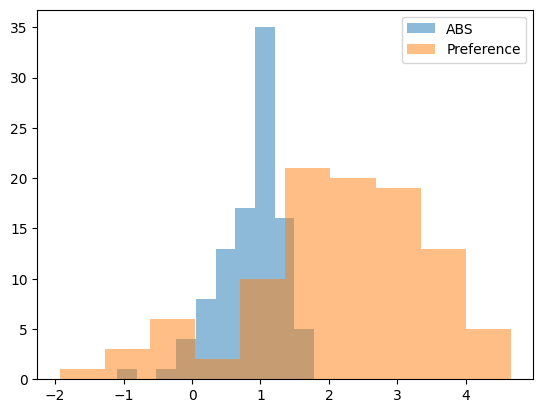

Correlation: 0.4540049060452229
T-test: T-Stat=-11.308896108190766, P-Value=1.5675477402068153e-19


In [5]:


# # Assuming reward_abs_score and reward_preference are your lists of scores
# mean_abs = np.mean(reward_abs_score)
# mean_pref = np.mean(reward_preference)

# # Basic statistics
# print(f"Mean ABS Score: {mean_abs}, Mean Preference Score: {mean_pref}")

# # Plotting distributions
# plt.hist(reward_abs_score, alpha=0.5, label='ABS')
# plt.hist(reward_preference, alpha=0.5, label='Preference')
# plt.legend()
# plt.show()

# # Correlation
# correlation = np.corrcoef(reward_abs_score, reward_preference)[0, 1]
# print(f"Correlation: {correlation}")

# # Statistical test
# t_stat, p_val = stats.ttest_rel(reward_abs_score, reward_preference)
# print(f"T-test: T-Stat={t_stat}, P-Value={p_val}")


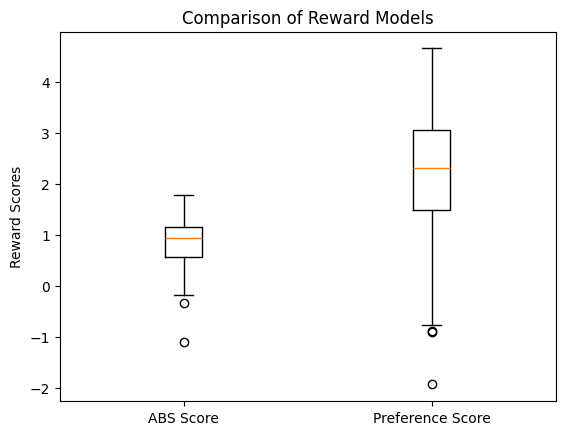

In [6]:
# import matplotlib.pyplot as plt

# # Assuming reward_abs_score and reward_preference are your lists of scores
# data_to_plot = [reward_abs_score, reward_preference]

# # Creating a box plot
# plt.figure()
# plt.boxplot(data_to_plot)
# plt.xticks([1, 2], ['ABS Score', 'Preference Score'])
# plt.ylabel('Reward Scores')
# plt.title('Comparison of Reward Models')
# plt.show()


In [2]:

# import numpy as np
# from glob import glob
# import os
# import json

# def get_ordered_path(paths):
#     sorted_path = []
#     if 'crs' in paths[0] or 'abs' in paths[0]:
#         checkpoint_numbers =  ['_80','_160','_240','_320','_400','_480','_560','_checkpoint']
#     else:
#         checkpoint_numbers = ['_100','_200','_300','_400','_500','_checkpoint']
#     for num in checkpoint_numbers:
#         for p in paths:
#             if num in p:
#                 sorted_path.append(p)
#                 break
#     return sorted_path

# rlhf_model_names = ["LLama-2-7b-oasst-baseline_rl_abs_quality_rw_075_bs16_kl_002_clip_04_512_max_token_with_pad_eos_lr_141e5_logits",
#                     "LLama-2-7b-oasst-baseline_rl_bs16_kl_002_clip_04_512_max_token_with_pad_eos_lr_141e5",
#                     "LLama-2-7b-oasst-baseline_rl_f_crs_025_bs16_kl_002_clip_04_512_max_token_with_pad_eos_lr_141e5",

#                     ]
# reward_key = 'abs_reward'#,'reward'
# all_score = []
# for n in rlhf_model_names:
#     print(f'\n==== Stats for model at path {n}====')
#     eval_path = os.path.join("../output/rl",n,"rewarded_eval")
#     all_jsons = glob(eval_path+'/tuning*.json')
#     sorted_path = get_ordered_path(all_jsons) #all_jsons #
#     # print(f'sorted_path:{sorted_path}')
#     mean_one_rwd = []
#     for s in sorted_path:
#         print('-------')
#         print(f'**{s.split("/")[-1]}**')
#         # print(f"**mean score for checkpoint {s.split('/')[-1].split('_')[-2]}**")
#         with open(s,'r') as f:
#             data = json.load(f)
#             r_rw = []
#             a_rw = []
#             c025_rw = []
#             c0625_rw = []
#             onereward = []
#             for d in data:
#                 r_rw.append(d["reward"])
#                 a_rw.append(d["abs_reward"])
#                 c025_rw.append(d["crs_025_reward"])
#                 c0625_rw.append(d["crs_0625_reward"])
#                 onereward.append(d[reward_key])
#         mean_one_rwd.append(np.mean(onereward))
#         # print(f'rank reward :{np.mean(r_rw)},abs reward:{np.mean(a_rw)}, crs 025:{np.mean(c025_rw)}, crs 0625:{np.mean(c0625_rw)}')
#         print(f'**mean reward score for reward type {reward_key} is {np.mean(onereward)} and std {np.std(onereward)}**')
#     all_score.append(mean_one_rwd)
            




     

In [3]:
# import matplotlib.pyplot as plt

# # Checkpoint numbers
# checkpoint_numbers_1_3 = [80, 160, 240, 320, 400, 480, 560, 562]
# checkpoint_numbers_2 = [100, 200, 300, 400, 500, 562]

# # Scores from each checkpoint
# score_1 = all_score[0]
# score_2 = all_score[1]
# # score_3 = all_score[2]

# # Plot the scores
# plt.figure(figsize=(10, 5))

# plt.plot(checkpoint_numbers_1_3, score_1, 'o-', label='Score 1')
# plt.plot(checkpoint_numbers_2, score_2, 's-', label='Score 2')
# # plt.plot(checkpoint_numbers_1_3, score_3, '^-', label='Score 3')

# # Adding titles and labels
# plt.title('Progress of Reward Scores over Training Checkpoints')
# plt.xlabel('Checkpoint Number')
# plt.ylabel('Reward Score')
# plt.legend()

# # Show the plot
# plt.show()


# Agreement of both reward model with GPT4

In [41]:
import json

final_abs_prediction_fn = "../output/rl/LLama-2-7b-oasst-baseline_rl_abs_quality_rw_075_bs16_kl_002_clip_04_512_max_token_with_pad_eos_lr_141e5_logits/rewarded_eval/final_p_09_t_08_rlhf_output.json"
final_pref_prediction_fn = "../output/rl/LLama-2-7b-oasst-baseline_rl_bs16_kl_002_clip_04_512_max_token_with_pad_eos_lr_141e5/rewarded_eval/final_p_09_t_08_rlhf_output.json"
gpt_4_prediction_fn = "../alpaca_eval/gpt4_result/final_rank002_vs_abs002.json"


def read_data(fn,sort_key):
    with open(fn,'r') as f:
        data = json.load(f)
    if sort_key == "query":
        for d in data:
            d[sort_key] = d[sort_key].split("<|im_start|>user\n")[-1].split("<|im_end|>\n<|im_start|>assistant\n")[0]

    sorted_data = sorted(data, key=lambda x: x[sort_key])
    return sorted_data


#read prediction from abs model and preference model
final_abs_prediction_data = read_data(final_abs_prediction_fn,'query')
final_pref_prediction_data = read_data(final_pref_prediction_fn,'query')
#read gpt preference among abs and rank model
gpt_4_prediction_data = read_data(gpt_4_prediction_fn,'instruction')

# number of time abs score agrees with gpt4
abs_gpt_aggrement = []
# number of time pref score agress with gpt4
pref_gpt_aggrement = []
# number of time mutual aggrement
mutual_aggrement = []

for abs,pref,gpt4 in zip(*[final_abs_prediction_data,final_pref_prediction_data,gpt_4_prediction_data]):
    # get colname for abs model response
    abs_col = "output_1" if gpt4["generator_1"] == "abs" else "output_1"
    # get col name for pref model resposne
    pref_col = "output_2" if abs_col == "output_1" else "output_1"
    # get index
    abs_model_idx = int(abs_col.split('_')[-1])
    pref_model_idx = int(pref_col.split('_')[-1])
    # which model is winning according to gpt4
    gpt4_preference = gpt4["preference"]

    assert abs["query"] == pref["query"] == gpt4 ["instruction"]
    assert abs["response"] == gpt4[abs_col]
    assert pref["response"] == gpt4[pref_col]

    # How abs reward model and pref reward model has score the prediction from abs rlhf model
    pref_score_abs_model = abs["reward"]
    abs_score_abs_model = abs["abs_reward"]

    # How abs reward model and pref reward model has score the prediction from pref rlhf model
    pref_score_pref_model = pref["reward"]
    abs_score_pref_model = pref["abs_reward"]

    # Which model is winner when using pref score
    winner_pref_score = abs_model_idx if pref_score_abs_model > pref_score_pref_model else pref_model_idx

    # Which model is winner when using abs score
    winner_abs_score = abs_model_idx if abs_score_abs_model > abs_score_pref_model else pref_model_idx

    
    abs_gpt_aggrement.append(1 if winner_abs_score == gpt4_preference else 0)
    pref_gpt_aggrement.append(1 if winner_pref_score == gpt4_preference else 0)
    mutual_aggrement.append(1 if winner_pref_score == winner_abs_score else 0)

    # break
sum(abs_gpt_aggrement),sum(pref_gpt_aggrement),sum(mutual_aggrement)



AssertionError: 

# Agreement of both the reward model with human (due to path error code wont work)

In [65]:
# import transformers
# import torch
# import os
# from glob import glob
# import json 
# from peft import PeftModel

# import argparse

# from utils import (print_yaml_config,init_or_resume_from, read_yaml)
# from model_training.training_utils import load_for_inference
# from constants import TOKENIZER_SEPECIAL_TOKENS
# from training_datasets.dataset_utils import load_rm_dataset


# CACHE_DIR = 'cache'
# dtype = torch.bfloat16

# def get_reward_tokenizer_model(reward_model_name,abs_adapter_name,ranking_adapter_name,device_map="auto"):
#     print('**** loading reward model ****')
#     # Since reward models are trained using the same base model, we should use same model
#     base_reward_model = transformers.AutoModelForSequenceClassification.from_pretrained(
#             reward_model_name,
#             num_labels=1,
#             use_flash_attention_2=True,
#             load_in_8bit=True,
#             device_map=device_map,
#             torch_dtype=dtype,
#             cache_dir=CACHE_DIR,
#             )
#     reward_tokenizer = transformers.AutoTokenizer.from_pretrained(reward_model_name, cache_dir=CACHE_DIR)
#     reward_tokenizer.add_special_tokens({"pad_token":"<PAD>","eos_token":"<|im_end|>","sep_token":"<SEP>"})
#     print(f'tokenizer pad {reward_tokenizer.pad_token} and model pad {base_reward_model.config.pad_token_id}')
#     print(f'tokenizer eos {reward_tokenizer.eos_token} and model eos {reward_tokenizer.eos_token_id}')
#     if base_reward_model.config.pad_token_id is None or base_reward_model.config.pad_token_id == 0:
#         print('changing model pad token id')
#         base_reward_model.config.pad_token_id = reward_tokenizer.pad_token_id

#     abs_model_name =  os.path.join(abs_adapter_name,'final_checkpoint')
#     ranking_model_name = os.path.join(ranking_adapter_name,'final_checkpoint')
#     print(ranking_model_name),
#     print(abs_model_name)

#     base_reward_model = PeftModel.from_pretrained(
#         base_reward_model,
#         ranking_model_name,
#         adapter_name="ranking",
#         is_trainable=False,
#         device_map=device_map
#         )
#     base_reward_model.load_adapter(abs_model_name,adapter_name="abs",is_trainable=False)
#     base_reward_model = base_reward_model.to(base_reward_model.device)
#     return base_reward_model,reward_tokenizer


# reward_model_name = "andreaskoepf/llama2-7b-oasst-baseline"
# abs_adapter_name = "output/rm/LLama-2-7b-oasst-baseline_reward_abs_bs128_ep_1_8bit_logistic_s_075_augment_and__under"
# ranking_adapter_name = "output/rm/LLama-2-7b-oasst-baseline_reward_ranking_bs64_ep_1_8bit_bf16_eos_token"
# device_map = {"":0}



# config = {}
# conf = read_yaml('./config.yaml')
# config.update(conf["default"])
# config.update(conf["rm"])
# config["name_suffix"] = ""
# config["debug"] = False
# config["subset"] = "rm"

# # Create a Namespace object for config
# config_ranking = argparse.Namespace(**config)
# train_e , eval_e = load_rm_dataset(config_ranking)



# reward_model, tokenizer = get_reward_tokenizer_model(reward_model_name,abs_adapter_name,ranking_adapter_name,device_map)


# from training_datasets.dataset_utils import get_rm_formatted
# import transformers
# from training_datasets.collators import RankingDataCollator

# max_replies = 4
# max_length = 2048
# min_prefix_length = 256
# model_name = "andreaskoepf/llama2-7b-oasst-baseline"

# collate_fn = RankingDataCollator(
#             tokenizer,
#             max_length=max_length,
#             pad_to_multiple_of=16,
#             max_replies=max_replies
#         )

# def get_prediction(adapter,eval_e):
#     predictions = []
#     diff = []
#     reward_model.set_adapter(adapter)
#     for example in eval_e["oasst_export"]:
#         batch,cu_lens = collate_fn([example])
#         batch = batch.to(reward_model.device)

#         with torch.no_grad():
#             prediction = reward_model(input_ids=batch["input_ids"],
#                                   attention_mask=batch["attention_mask"]).logits.T.cpu().float()

#         for start, end in zip(cu_lens[:-1], cu_lens[1:]):
#             pairs = torch.combinations(torch.arange(end - start), 2)
#             pos_ids, neg_ids = pairs[:, 0], pairs[:, 1]
#             pos_logits = prediction.take(start + pos_ids)
#             neg_logits = prediction.take(start + neg_ids)
#             diff.append(prediction[0][0] - prediction[0][-1])
#             predictions.extend(pos_logits>neg_logits)
#     return predictions,diff


In [66]:
# prediction,diff = get_prediction("ranking",eval_e)
# print(f'accuracy of ranking model on eval dataset {np.mean(prediction)} with average logits diff of {np.mean(diff)}')

print('accuracy of ranking model on eval dataset 0.7705515088449532 with average logits diff of 1.7199171781539917')

accuracy of ranking model on eval dataset 0.7705515088449532 with average logits diff of 1.7199171781539917


In [67]:
# prediction2,diff2 = get_prediction("abs",eval_e)
# print(f'accuracy of ranking model on eval dataset {np.mean(prediction2)} with average logits diff of {np.mean(diff2)}')

print('accuracy of ranking model on eval dataset 0.6873048907388137 with average logits diff of 0.4806534945964813')

accuracy of ranking model on eval dataset 0.6873048907388137 with average logits diff of 0.4806534945964813


In [68]:
# mutual_aggrement = [1 if p==p2 else 0 for p,p2 in zip(prediction,prediction2)]
# np.mean(mutual_aggrement)
print(0.7523413111342352)

0.7523413111342352


# Corelation of win rate vs lenght 

In [28]:
from glob import glob
import json
import transformers


reward_tokenizer = transformers.AutoTokenizer.from_pretrained("andreaskoepf/llama2-7b-oasst-baseline", cache_dir='cache')
reward_tokenizer.add_special_tokens({"pad_token":"<PAD>","eos_token":"<|im_end|>","sep_token":"<SEP>"})
all_path = glob('../alpaca_eval/gpt4_result/*.json')

winning_lengths = []
losing_lengths = []
leng = []
win_or_loss = []
for p in all_path:
    with open(p, 'r') as f:
        data = json.load(f)

        for d in data:
            winning_key = f'output_{d["preference"]}'
            losing_key = "output_2" if winning_key == "output_1" else "output_1"
            
            winning_response = reward_tokenizer(d[winning_key])
            losing_response = reward_tokenizer(d[losing_key])

            winning_lengths.append(len(winning_response.input_ids))
            losing_lengths.append(len(losing_response.input_ids))





Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


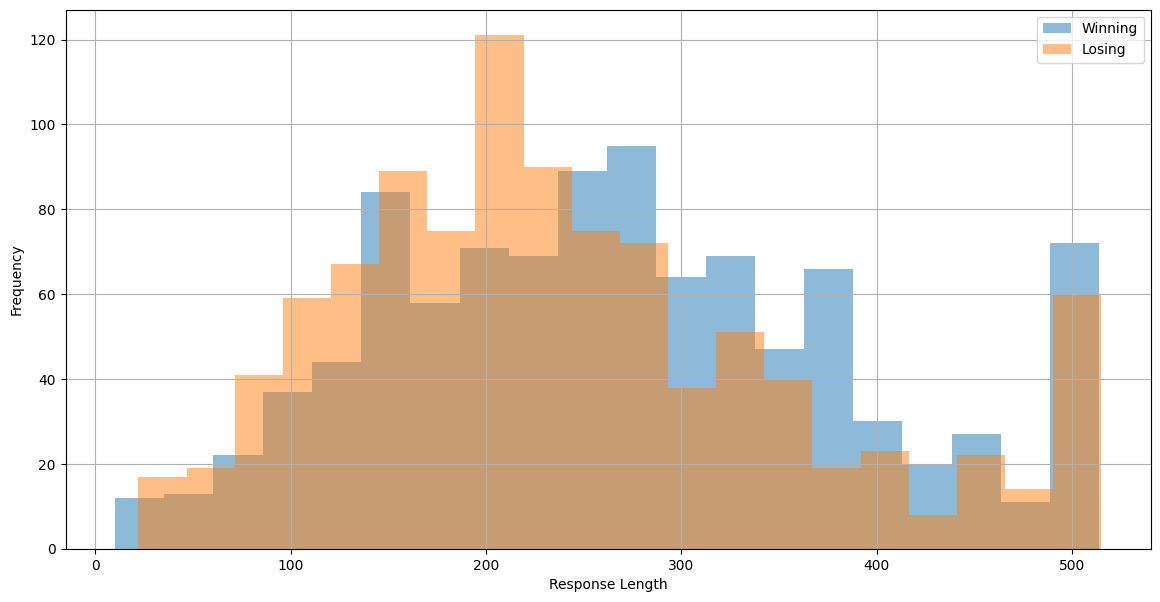

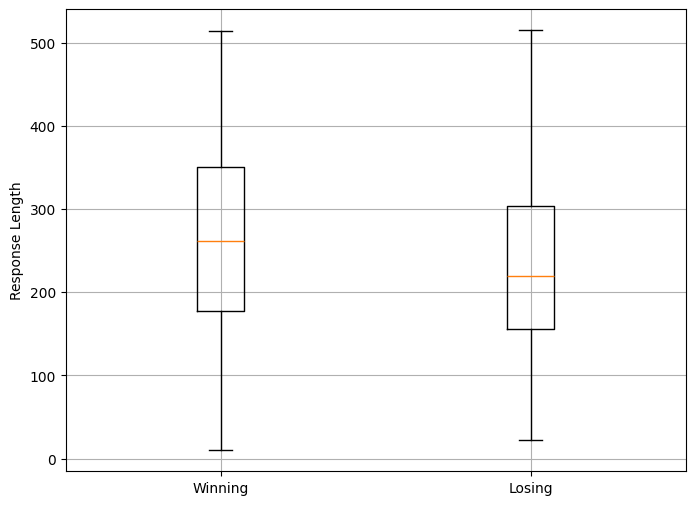

Independent t-test results: T-statistic = 4.890288201415756, P-value = 1.087316485085155e-06


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Plotting histograms
plt.figure(figsize=(14, 7))
plt.hist(winning_lengths, alpha=0.5, bins=20, label='Winning')
plt.hist(losing_lengths, alpha=0.5, bins=20, label='Losing')
# plt.title('Histogram of Response Lengths')
plt.xlabel('Response Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plotting box plots
plt.figure(figsize=(8, 6))
plt.boxplot([winning_lengths, losing_lengths], labels=['Winning', 'Losing'])
# plt.title('Box Plot of Response Lengths')
plt.ylabel('Response Length')
plt.grid(True)
plt.show()

# Statistical testing - using independent t-test
# Note: Use Mann-Whitney U Test if the distributions are not normally distributed
t_stat, p_value = stats.ttest_ind(winning_lengths, losing_lengths)
print(f"Independent t-test results: T-statistic = {t_stat}, P-value = {p_value}")



In [94]:
import numpy as np

# Calculate Pearson correlation coefficients
corr_1 = np.corrcoef(winning_lengths, losing_lengths)[0, 1]

print(f"Pearson correlation between response length and r_rw Reward 1 scores: {corr_1}")


Pearson correlation between response length and r_rw Reward 1 scores: 0.5535043109501273


# Response length vs reward score

In [21]:

import numpy as np
from glob import glob
import os
import json


rlhf_model_names = ["LLama-2-7b-oasst-baseline_rl_abs_quality_rw_075_bs16_kl_002_clip_04_512_max_token_with_pad_eos_lr_141e5_logits",
                    "LLama-2-7b-oasst-baseline_rl_bs16_kl_002_clip_04_512_max_token_with_pad_eos_lr_141e5",
                    "LLama-2-7b-oasst-baseline_rl_f_crs_025_bs16_kl_002_clip_04_512_max_token_with_pad_eos_lr_141e5",
                    "LLama-2-7b-oasst-basseline_sft"
                    ]



reward_tokenizer = transformers.AutoTokenizer.from_pretrained("andreaskoepf/llama2-7b-oasst-baseline", cache_dir='cache')
reward_tokenizer.add_special_tokens({"pad_token":"<PAD>","eos_token":"<|im_end|>","sep_token":"<SEP>"})
all_path = glob('../alpaca_eval/gpt4_result/*.json')


r_rw = []
a_rw = []
res_len = []
for n in rlhf_model_names:
    print(f'\n==== Stats for model at path {n}====')
    eval_path = os.path.join("../output/rl",n,"rewarded_eval/final_p_09_t_08_rlhf_output.json")
    if 'sft' in eval_path:
        eval_path = eval_path.replace('_rlhf','_sft')
    # print(f"**mean score for checkpoint {s.split('/')[-1].split('_')[-2]}**")
    with open(eval_path,'r') as f:
        data = json.load(f)
        for d in data:
            r_rw.append(d["reward"])
            a_rw.append(d["abs_reward"])

            response_token = reward_tokenizer(d["response"])
            res_len.append(len(response_token.input_ids))



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.



==== Stats for model at path LLama-2-7b-oasst-baseline_rl_abs_quality_rw_075_bs16_kl_002_clip_04_512_max_token_with_pad_eos_lr_141e5_logits====

==== Stats for model at path LLama-2-7b-oasst-baseline_rl_bs16_kl_002_clip_04_512_max_token_with_pad_eos_lr_141e5====

==== Stats for model at path LLama-2-7b-oasst-baseline_rl_f_crs_025_bs16_kl_002_clip_04_512_max_token_with_pad_eos_lr_141e5====

==== Stats for model at path LLama-2-7b-oasst-basseline_sft====


Mean ABS Score: 0.8619113159179688, Mean Preference Score: 2.256882658004761


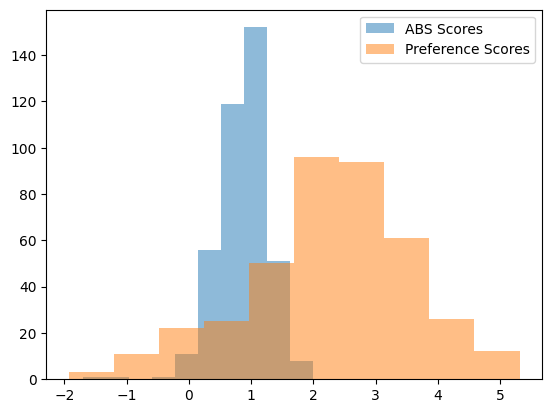

Correlation: 0.4371067547667837


In [22]:
mean_abs = np.mean(a_rw)
mean_pref = np.mean(r_rw)

# Basic statistics
print(f"Mean ABS Score: {mean_abs}, Mean Preference Score: {mean_pref}")

# Plotting distributions
plt.hist(a_rw, alpha=0.5, label='ABS Scores')
plt.hist(r_rw, alpha=0.5, label='Preference Scores')
plt.legend()
plt.show()

# Correlation
correlation = np.corrcoef(a_rw, r_rw)[0, 1]
print(f"Correlation: {correlation}")

# # Statistical test
# t_stat, p_val = stats.ttest_rel(a_rw, r_rw)
# print(f"T-test: T-Stat={t_stat}, P-Value={p_val}")


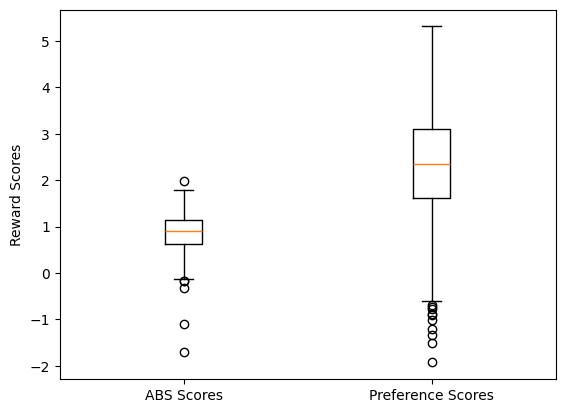

In [23]:
import matplotlib.pyplot as plt

# Assuming reward_abs_score and reward_preference are your lists of scores
data_to_plot = [a_rw,r_rw]

# Creating a box plot
plt.figure()
plt.boxplot(data_to_plot)
plt.xticks([1, 2], ['ABS Scores', 'Preference Scores'])
plt.ylabel('Reward Scores')
# plt.title('Comparison of Reward Models')
plt.show()


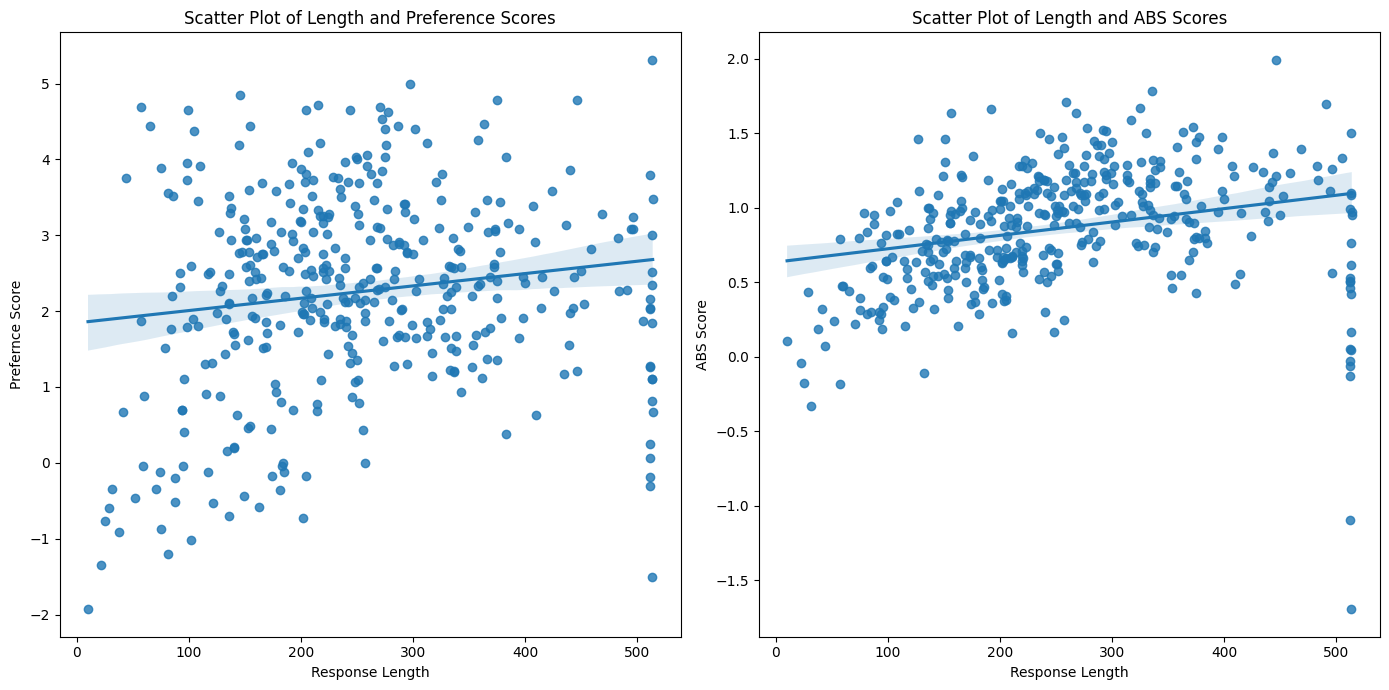

In [24]:

import seaborn as sns
# Create scatter plots
plt.figure(figsize=(14, 7))

# Scatter plot for Reward 1 Scores
plt.subplot(1, 2, 1)
sns.regplot(x=res_len, y=r_rw)
plt.title('Scatter Plot of Length and Preference Scores')
plt.xlabel('Response Length')
plt.ylabel('Prefernce Score')

# Scatter plot for Reward 2 Scores
plt.subplot(1, 2, 2)
sns.regplot(x=res_len, y=a_rw)
plt.title('Scatter Plot of Length and ABS Scores')
plt.xlabel('Response Length')
plt.ylabel('ABS Score')

# Show the plots
plt.tight_layout()
plt.show()

In [25]:
import numpy as np

# Calculate Pearson correlation coefficients
corr_1 = np.corrcoef(res_len, r_rw)[0, 1]
corr_2 = np.corrcoef(res_len, a_rw)[0, 1]

print(f"Pearson correlation between response length and r_rw Reward 1 scores: {corr_1}")
print(f"Pearson correlation between response length and a_rw Reward 2 scores: {corr_2}")


Pearson correlation between response length and r_rw Reward 1 scores: 0.14858423889186698
Pearson correlation between response length and a_rw Reward 2 scores: 0.25936993621657267


In [38]:
from glob import glob
import json
import transformers


reward_tokenizer = transformers.AutoTokenizer.from_pretrained("andreaskoepf/llama2-7b-oasst-baseline", cache_dir='cache')
reward_tokenizer.add_special_tokens({"pad_token":"<PAD>","eos_token":"<|im_end|>","sep_token":"<SEP>"})
all_path = glob('../alpaca_eval/gpt4_result/*.json')

abs_len = []
pref_len = []
abs_win_indicator = []
pref_win_indicator = []

p = '../alpaca_eval/gpt4_result/final_rank002_vs_abs002.json'
with open(p, 'r') as f:
    data = json.load(f)
    
    abs_gen = "output_1" if data[0]["generator_1"] == "abs" else "output_2"
    pref_gen = "output_2" if abs_gen == "output_1" else "output_1"

    for d in data:
        abs_len.append(
            len(reward_tokenizer(d[abs_gen])["input_ids"])
            )
        pref_len.append(
            len(reward_tokenizer(d[pref_gen])["input_ids"])
            )

        winning_key = f'output_{d["preference"]}'
        losing_key = "output_2" if winning_key == "output_1" else "output_1"

        if winning_key == abs_gen:
            abs_win_indicator.append(1)
            pref_win_indicator.append(0)
        else:
            abs_win_indicator.append(0)
            pref_win_indicator.append(1)
        
# Calculate the Pearson correlation coefficient
correlation_abs = np.corrcoef(abs_len, abs_win_indicator)[0, 1]
# Calculate the Pearson correlation coefficient
correlation_pref = np.corrcoef(pref_len, pref_win_indicator)[0, 1]


print(correlation_abs,correlation_pref)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


0.1589302952047117 -0.032809076209437675
